**PROYEK AKHIR DICODING : *BIKE SHARING***


# Fauzan Daffa Raditya - M010D4KY2333


**PREPROCESSING**

## <span style="font-size: 30px; font-weight: bold;">Import Modul yang Dibutuhkan</span>

In [ ]:
from collections import Counter
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score, recall_score, precision_score
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA

## <span style="font-size: 30px; font-weight: bold;">Membaca Dataset Bike Sharing</span>

In [ ]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

## <span style="font-size: 30px; font-weight: bold;">Mengecek masing-masing isi file CSV</span>

In [ ]:
display(df_day.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
display(df_hour.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## <span style="font-size: 30px; font-weight: bold;">Mengecek duplikat</span>


In [ ]:
count_duplicated_day = df_day.duplicated().sum()
print("Jumlah Data Duplikat atau redundant pada file day.csv =", count_duplicated_day)

Jumlah Data Duplikat atau redundant pada file day.csv = 0


In [ ]:
count_duplicated_hour = df_day.duplicated().sum()
print("Jumlah Data Duplikat atau redundant pada file hour.csv =", count_duplicated_hour)

Jumlah Data Duplikat atau redundant pada file hour.csv = 0


**Karena tidak ada data yang duplikat, maka kita dapat menggunakan dataset asli tanpa harus melakukan drop duplicate**

## <span style="font-size: 30px; font-weight: bold;">Mengecek Data yang mengandung null</span>

In [ ]:
count_null_day = df_day.isnull().sum()
filtered_matches = count_null_day[count_null_day > 0].reset_index()
filtered_matches.columns = ['Column Name', 'Null Count']
display(filtered_matches)

,Column Name,Null Count


In [ ]:
count_null_hour = df_hour.isnull().sum()
filtered_matches = count_null_hour[count_null_hour > 0].reset_index()
filtered_matches.columns = ['Column Name', 'Null Count']
display(filtered_matches)

,Column Name,Null Count


**Karena tidak ada data yang mengandung null value, maka tidak ada nama kolom yang ditampilkane**

## <span style="font-size: 30px; font-weight: bold;">Mengecek Data yang mengandung Outlier</span>

In [ ]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

Cek Outlier pada dataframe day

In [ ]:
# Assuming df_day and df_hour are your DataFrames
check_outlier(df_day)

Outlier pada tiap atribut:
atemp          0
casual        44
cnt            0
dteday         0
holiday       21
hum            2
instant        0
mnth           0
registered     0
season         0
temp           0
weathersit     0
weekday        0
windspeed     13
workingday     0
yr             0
dtype: int64


<ipython-input-9-0cc1ae9f8111>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-9-0cc1ae9f8111>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-9-0cc1ae9f8111>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


,atemp,casual,cnt,dteday,holiday,hum,instant,mnth,registered,season,temp,weathersit,weekday,windspeed,workingday,yr
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Cek outlier pada dataframe hour

In [ ]:
check_outlier(df_hour)

Outlier pada tiap atribut:
atemp            0
casual        1192
cnt            505
dteday           0
holiday        500
hr               0
hum             22
instant          0
mnth             0
registered     680
season           0
temp             0
weathersit       3
weekday          0
windspeed      342
workingday       0
yr               0
dtype: int64


<ipython-input-9-0cc1ae9f8111>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-9-0cc1ae9f8111>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-9-0cc1ae9f8111>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


,atemp,casual,cnt,dteday,holiday,hr,hum,instant,mnth,registered,season,temp,weathersit,weekday,windspeed,workingday,yr
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17375,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Melakukan pengecekan data untuk tiap kolom**


In [ ]:
print("Daily Data Types:")
print(df_day.dtypes)
print("\nHourly Data Types:")
print(df_hour.dtypes)

Daily Data Types:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Hourly Data Types:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object



**Mengubah kolom 'dteday' mengikuti format datetime pada kedua dataframe**

In [ ]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

**Mengubah kolom lainnya yang merepresentasikan kategori menjadi tipe 'kategori'.
Hal ini dapat berguna untuk berbagai tipe analisis.**
**Kemudian cek tipe data kembali untuk memastikan perubahan yang dilakukan**

In [ ]:
category_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in category_columns:
    df_day[col] = df_day[col].astype('category')
    df_hour[col] = df_hour[col].astype('category')

print("\nAfter Conversion - Daily Data Types:")
print(df_day.dtypes)
print("\nAfter Conversion - Hourly Data Types:")
print(df_hour.dtypes)


After Conversion - Daily Data Types:
instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

After Conversion - Hourly Data Types:
instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
hr                     int64
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered

**Memeriksa baris awal untuk memastikan data telah di load dan di format dengan benar**

In [ ]:
print("\nDaily Data Preview:")
print(df_day.head())
print("\nHourly Data Preview:")
print(df_hour.head())


Daily Data Preview:
   instant     dteday season yr mnth holiday weekday workingday weathersit  \
0        1 2011-01-01      1  0    1       0       6          0          2   
1        2 2011-01-02      1  0    1       0       0          0          2   
2        3 2011-01-03      1  0    1       0       1          1          1   
3        4 2011-01-04      1  0    1       0       2          1          1   
4        5 2011-01-05      1  0    1       0       3          1          1   

       temp     atemp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.363625  0.805833   0.160446     331         654   985  
1  0.363478  0.353739  0.696087   0.248539     131         670   801  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600  

Hourly Data Preview:
   instant     dteday season yr mnth  hr holiday weekday worki

## **Eksplorasi Data**

## **Analisis tren waktu (data harian)**

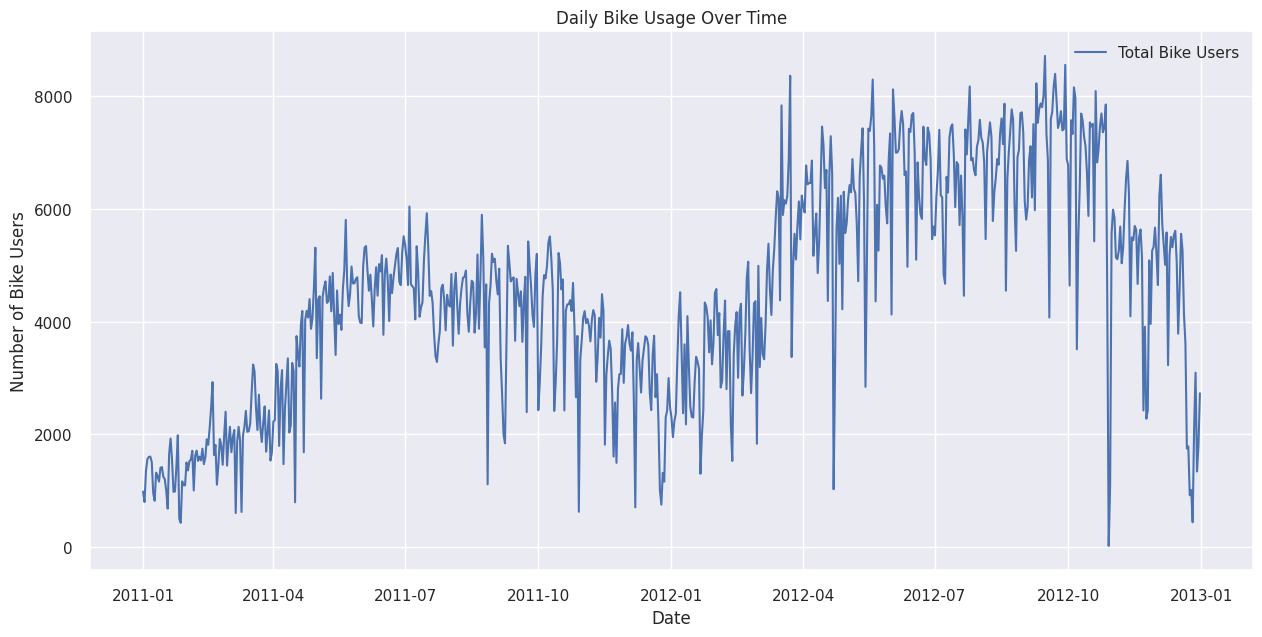

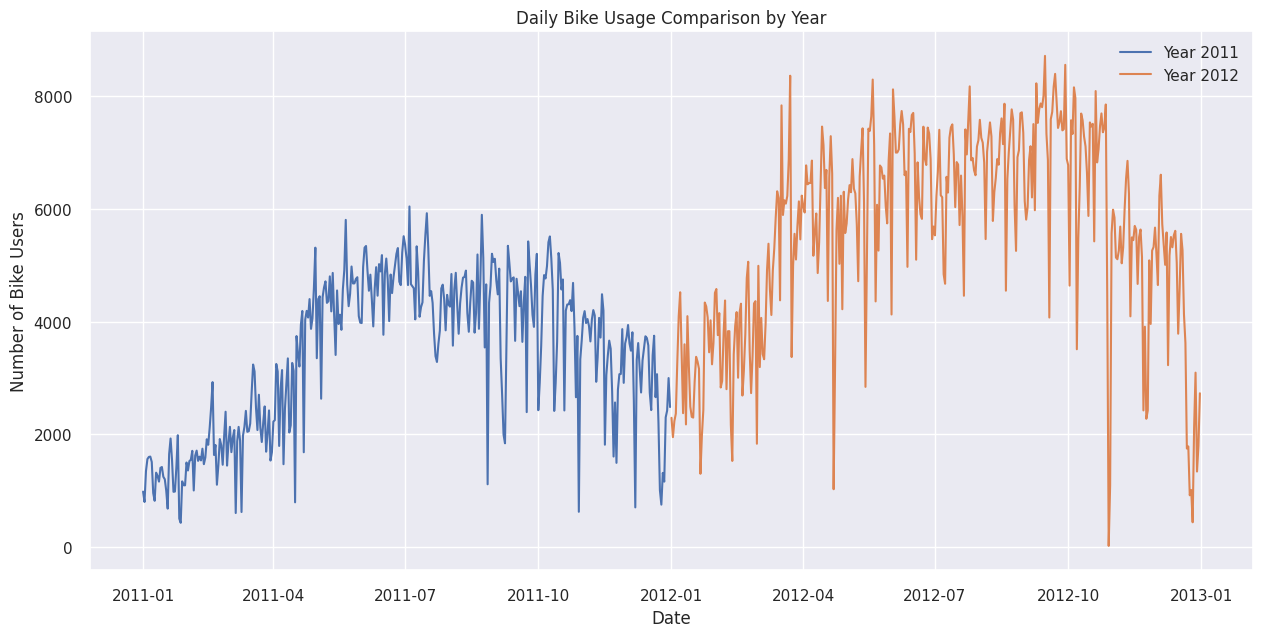

In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="darkgrid")

# Create a time series plot of the total number of bike users ('cnt') over time
plt.figure(figsize=(15, 7))
plt.plot(df_day['dteday'], df_day['cnt'], label='Total Bike Users')

# Enhance the plot with titles, labels, and legend
plt.title('Daily Bike Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bike Users')
plt.legend()

# Display the plot
plt.show()

# To compare between years, you may want to create a year column (if not already present) and use it for comparison
df_day['year'] = df_day['dteday'].dt.year

# Visualize the yearly trend of bike usage
plt.figure(figsize=(15, 7))
for year in df_day['year'].unique():
    subset = df_day[df_day['year'] == year]
    plt.plot(subset['dteday'], subset['cnt'], label=f'Year {year}')

plt.title('Daily Bike Usage Comparison by Year')
plt.xlabel('Date')
plt.ylabel('Number of Bike Users')
plt.legend()

# Display the plot
plt.show()

Langkah ini mencakup pembuatan plot seri waktu untuk jumlah total pengguna sepeda (cnt) setiap hari. Plot ini akan membantu  mengidentifikasi pola atau tren, seperti pertumbuhan penggunaan sepeda seiring waktu atau fluktuasi musiman. Plot kedua membandingkan penggunaan sepeda antara tahun-tahun yang tersedia dalam dataset, memungkinkan kita untuk melihat perubahan dari tahun ke tahun secara visual.

Pastikan kita sudah melakukan data preprocessing untuk memastikan kolom dteday telah dikonversi menjadi tipe data datetime, yang memudahkan pembuatan plot seri waktu.

## **Pengaruh cuaca (data harian)**

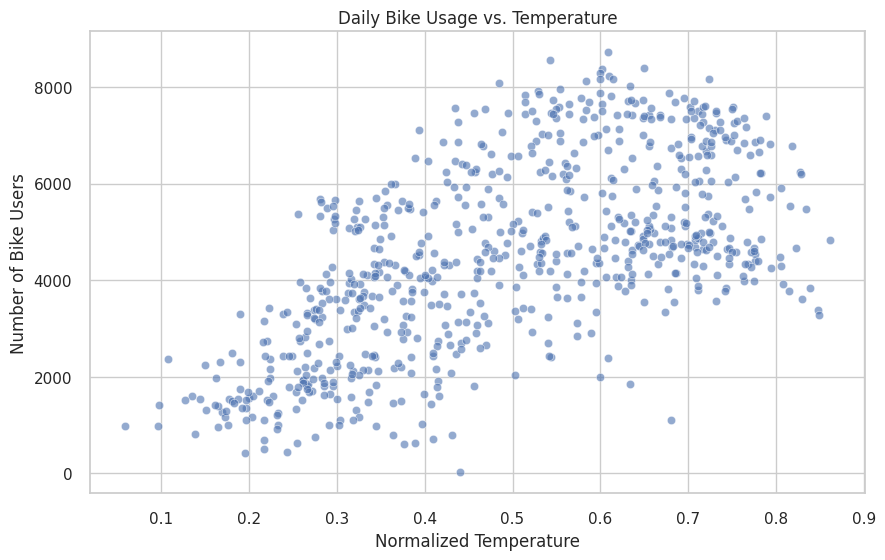

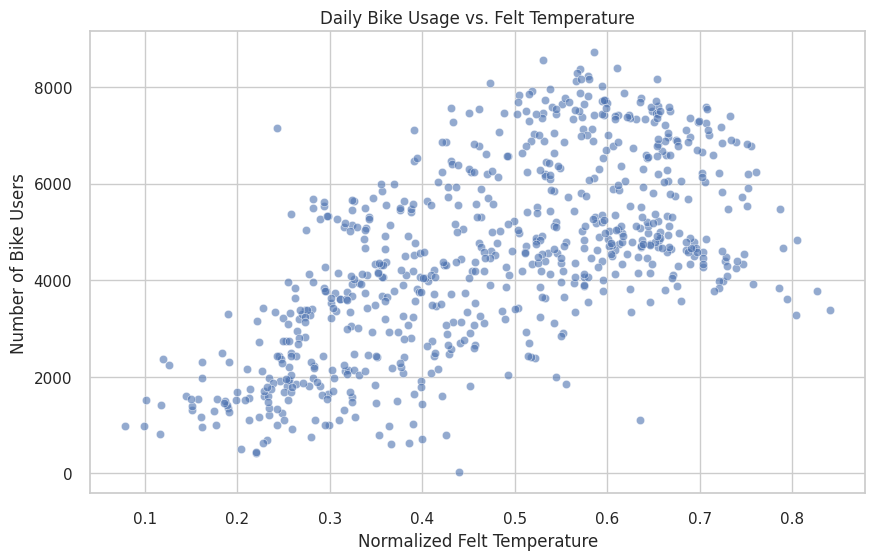

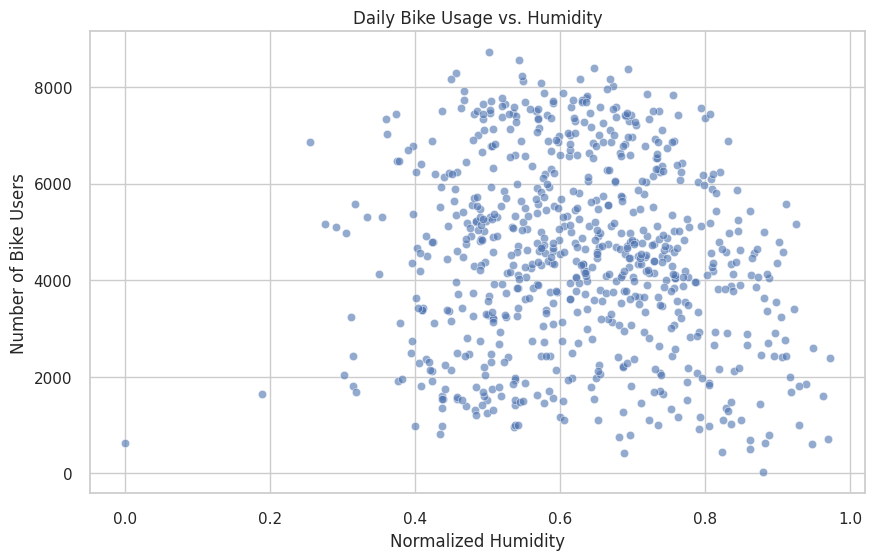

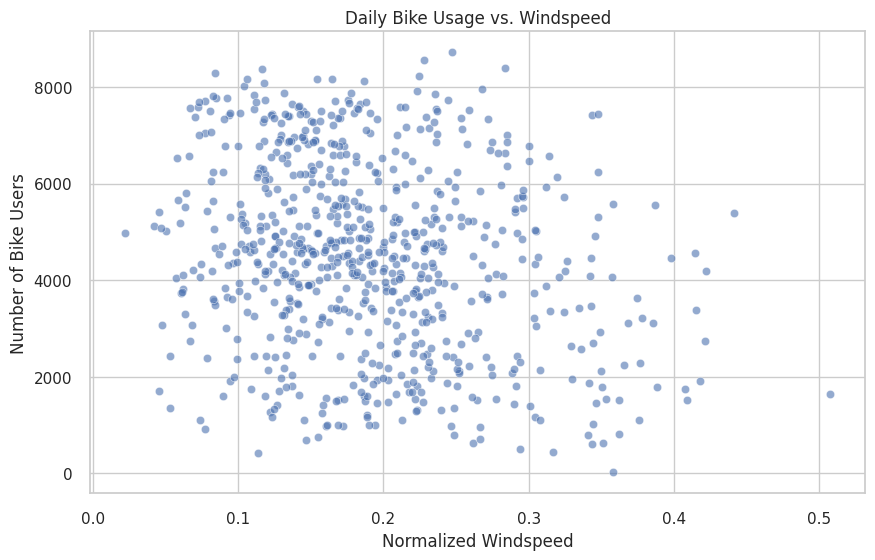

In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create scatter plots to visualize the relationship between weather conditions and bike usage

# Temperature vs. Bike Users
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df_day, alpha=0.6)
plt.title('Daily Bike Usage vs. Temperature')
plt.xlabel('Normalized Temperature')
plt.ylabel('Number of Bike Users')
plt.show()

# Felt Temperature vs. Bike Users
plt.figure(figsize=(10, 6))
sns.scatterplot(x='atemp', y='cnt', data=df_day, alpha=0.6)
plt.title('Daily Bike Usage vs. Felt Temperature')
plt.xlabel('Normalized Felt Temperature')
plt.ylabel('Number of Bike Users')
plt.show()

# Humidity vs. Bike Users
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=df_day, alpha=0.6)
plt.title('Daily Bike Usage vs. Humidity')
plt.xlabel('Normalized Humidity')
plt.ylabel('Number of Bike Users')
plt.show()

# Windspeed vs. Bike Users
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=df_day, alpha=0.6)
plt.title('Daily Bike Usage vs. Windspeed')
plt.xlabel('Normalized Windspeed')
plt.ylabel('Number of Bike Users')
plt.show()


Kode ini menciptakan empat scatter plot yang masing-masing menampilkan hubungan antara jumlah pengguna sepeda (cnt) dengan suhu (temp), suhu yang dirasakan (atemp), kelembaban (hum), dan kecepatan angin (windspeed). Scatter plot adalah cara yang baik untuk memvisualisasikan hubungan antara dua variabel dan dapat membantu mengidentifikasi pola atau tren, seperti apakah jumlah pengguna sepeda meningkat pada hari dengan suhu tertentu atau bagaimana kelembaban mempengaruhi penggunaan sepeda.

Asumsi saya pada dataset ini, temp, atemp, hum, dan windspeed mungkin sudah dinormalisasi. Oleh karena itu, judul dan label pada sumbu X dalam visualisasi mengindikasikan bahwa nilai-nilai tersebut dinormalisasi.

## **Pola Penggunaan Berdasarkan Tipe Pengguna (Data Harian)**

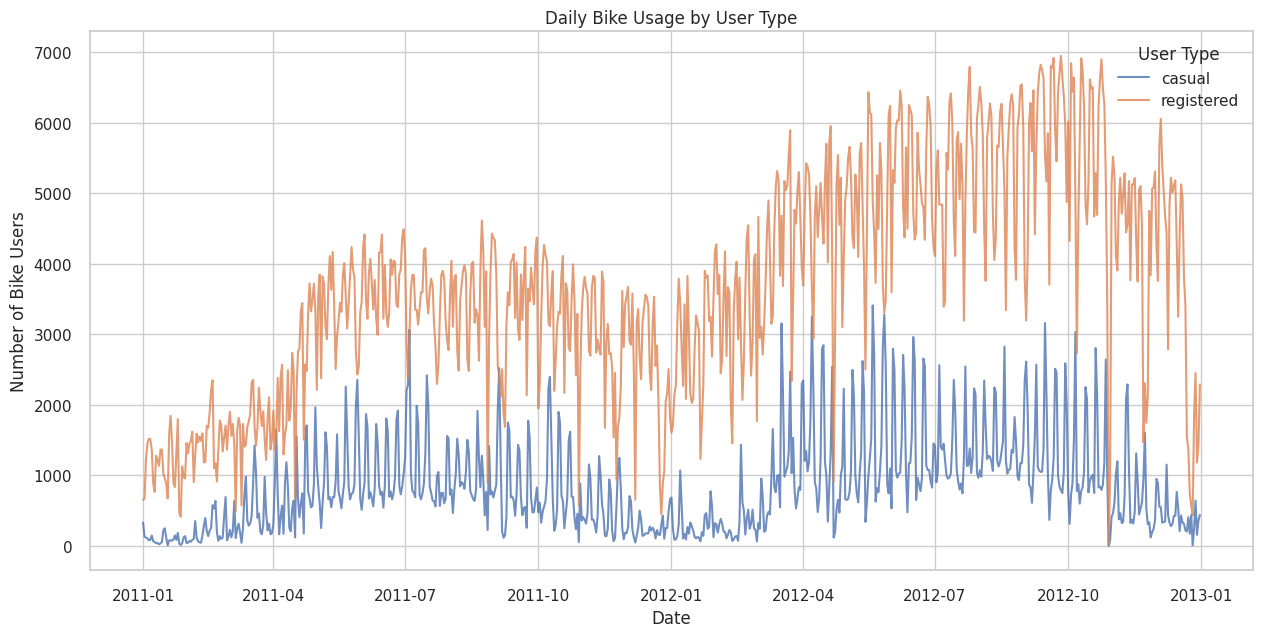

<ipython-input-26-cb4c8b67a86d>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  usage_day_type = df_day.groupby(['dteday', 'day_type']).sum()[['casual', 'registered']].reset_index()


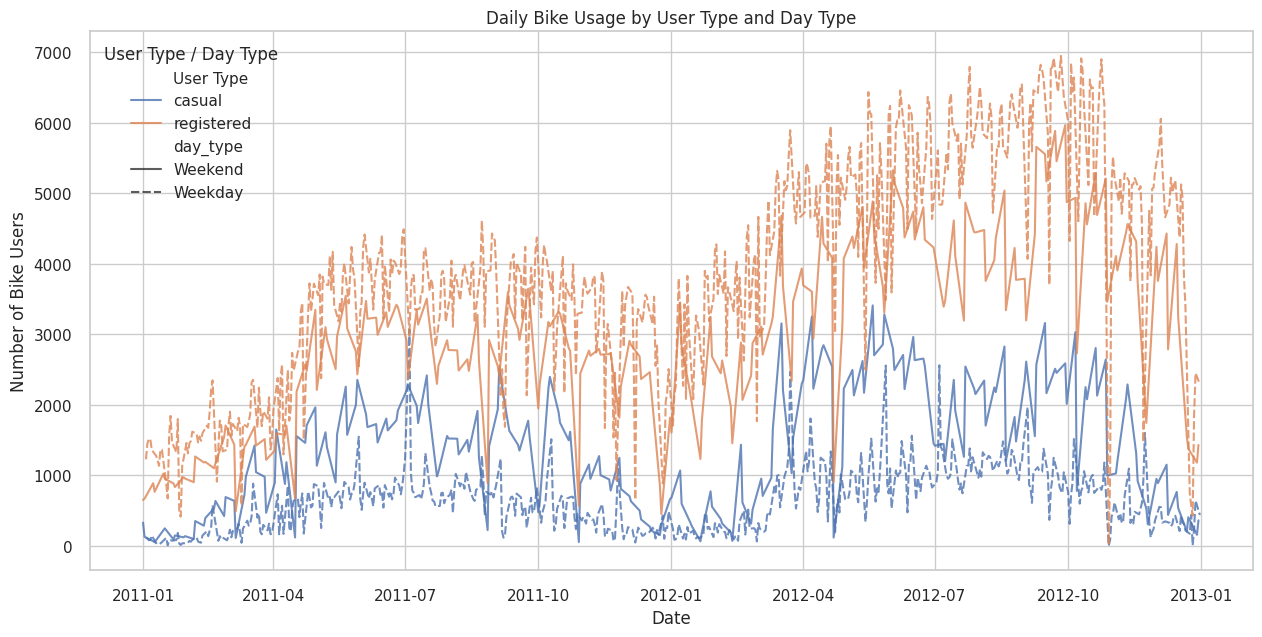

In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a new DataFrame that aggregates casual and registered users' counts by date
usage_types = df_day[['dteday', 'casual', 'registered']].melt(id_vars=['dteday'],
                                                               var_name='User Type',
                                                               value_name='Count')

# Plotting the daily bike usage by user type
plt.figure(figsize=(15, 7))
sns.lineplot(x='dteday', y='Count', hue='User Type', data=usage_types, alpha=0.8)
plt.title('Daily Bike Usage by User Type')
plt.xlabel('Date')
plt.ylabel('Number of Bike Users')
plt.legend(title='User Type')
plt.show()

# To analyze the usage pattern on weekdays vs. weekends, we can add a 'day type' column to the original DataFrame
df_day['day_type'] = df_day['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

# Now, create a similar plot but differentiate by day type
usage_day_type = df_day.groupby(['dteday', 'day_type']).sum()[['casual', 'registered']].reset_index()
usage_day_type = usage_day_type.melt(id_vars=['dteday', 'day_type'],
                                      var_name='User Type',
                                      value_name='Count')

plt.figure(figsize=(15, 7))
sns.lineplot(x='dteday', y='Count', hue='User Type', style='day_type', data=usage_day_type, alpha=0.8)
plt.title('Daily Bike Usage by User Type and Day Type')
plt.xlabel('Date')
plt.ylabel('Number of Bike Users')
plt.legend(title='User Type / Day Type')
plt.show()


Dua visualisasi ini memberikan insight yang berharga tentang pola penggunaan sepeda:

1. Penggunaan Harian oleh Tipe Pengguna: Plot pertama menampilkan penggunaan sepeda secara harian untuk pengguna kasual dan terdaftar. Hal ini memungkinkan Anda untuk melihat bagaimana masing-masing kelompok pengguna berkontribusi terhadap penggunaan sepeda secara keseluruhan sepanjang waktu.

2. Penggunaan Berdasarkan Tipe Hari: Plot kedua lebih lanjut membedakan penggunaan sepeda berdasarkan tipe hari (hari kerja vs. akhir pekan). Ini menunjukkan bagaimana pola penggunaan mungkin berbeda antara hari kerja dan akhir pekan, serta antara pengguna kasual dan terdaftar.

Kedua visualisasi ini bersama-sama memberikan gambaran yang jelas tentang bagaimana penggunaan sepeda berbeda antara pengguna kasual dan terdaftar, serta bagaimana pola ini mungkin berubah tergantung pada jenis hari.

## **Analisis Per Jam**

<ipython-input-27-a5b67ebb5d8d>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_hour, x='hr', y='cnt', ci=None, color='blue')


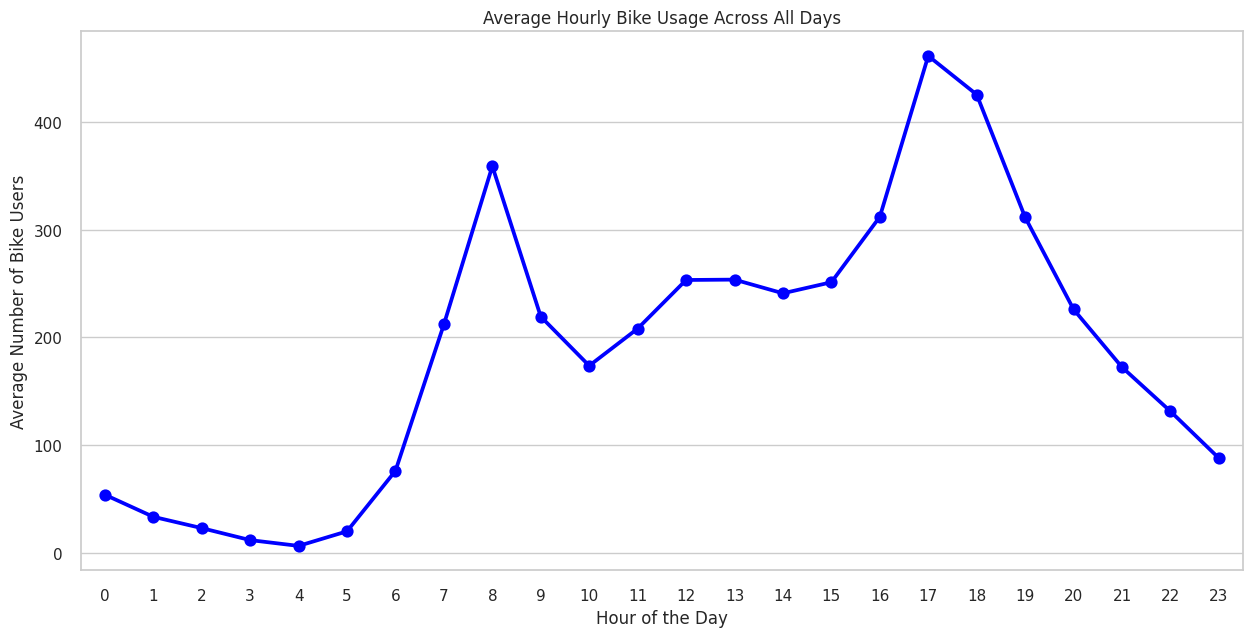

<ipython-input-27-a5b67ebb5d8d>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_hour, x='hr', y='cnt', hue='day_type', ci=None)


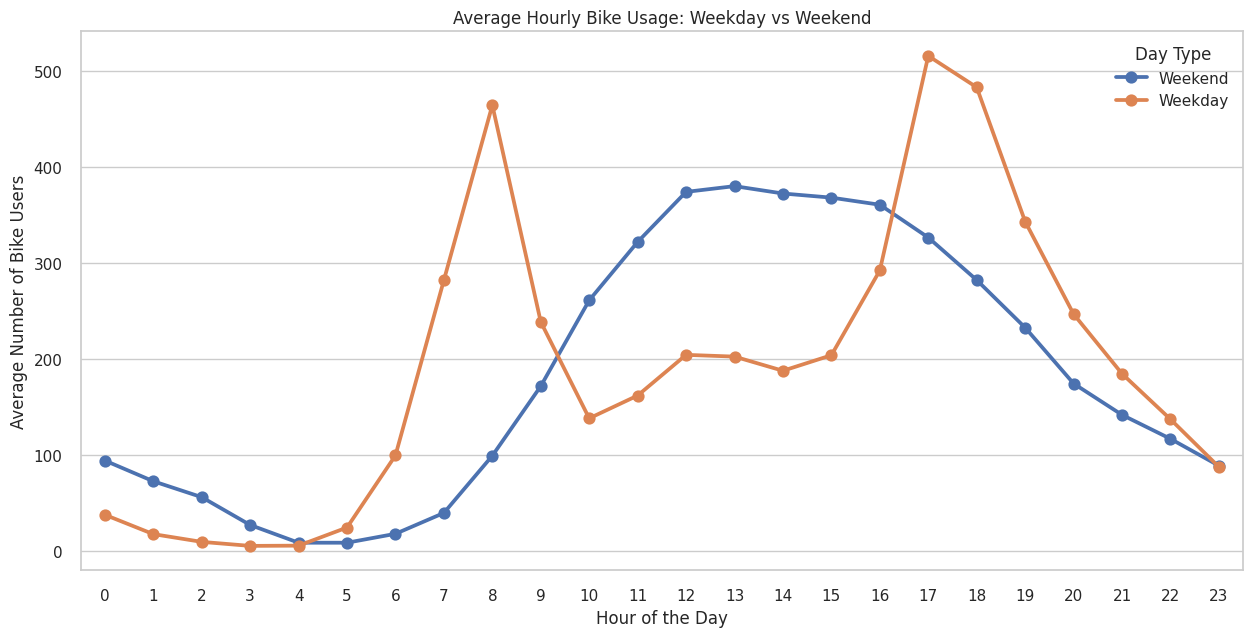

<ipython-input-27-a5b67ebb5d8d>:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_hour, x='hr', y='cnt', hue='weathersit', ci=None)


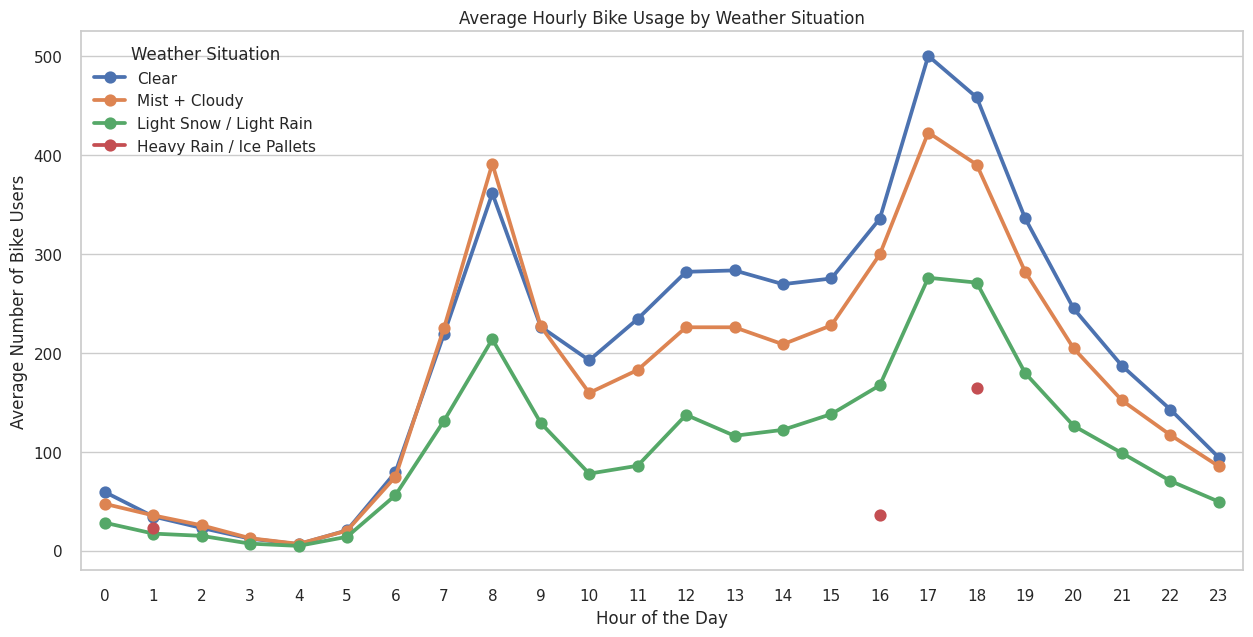

In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Hourly bike usage across all days
plt.figure(figsize=(15, 7))
sns.pointplot(data=df_hour, x='hr', y='cnt', ci=None, color='blue')
plt.title('Average Hourly Bike Usage Across All Days')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Bike Users')
plt.xticks(range(0, 24))
plt.show()

# To see if there's a difference in usage pattern between weekdays and weekends, let's add a 'day type' column
df_hour['day_type'] = df_hour['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

# Hourly bike usage on weekdays vs weekends
plt.figure(figsize=(15, 7))
sns.pointplot(data=df_hour, x='hr', y='cnt', hue='day_type', ci=None)
plt.title('Average Hourly Bike Usage: Weekday vs Weekend')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Bike Users')
plt.xticks(range(0, 24))
plt.legend(title='Day Type')
plt.show()

# It might also be interesting to explore how weather conditions affect hourly usage
# For simplicity, let's focus on the temperature effect
plt.figure(figsize=(15, 7))
sns.pointplot(data=df_hour, x='hr', y='cnt', hue='weathersit', ci=None)
plt.title('Average Hourly Bike Usage by Weather Situation')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Bike Users')
plt.xticks(range(0, 24))
plt.legend(title='Weather Situation', labels=['Clear', 'Mist + Cloudy', 'Light Snow / Light Rain', 'Heavy Rain / Ice Pallets'])
plt.show()


Langkah ini mencakup pembuatan tiga plot:

1. Penggunaan Rata-Rata Per Jam: Plot pertama menunjukkan rata-rata jumlah pengguna sepeda per jam sepanjang hari, memberikan gambaran umum tentang jam sibuk.

2. Perbandingan Hari Kerja vs. Akhir Pekan: Plot kedua membedakan penggunaan sepeda per jam antara hari kerja dan akhir pekan, menyoroti perbedaan pola penggunaan antara dua tipe hari ini.

3. Pengaruh Kondisi Cuaca: Plot ketiga mengeksplorasi bagaimana kondisi cuaca berbeda mempengaruhi penggunaan sepeda per jam, yang bisa sangat berguna untuk memahami preferensi pengguna dalam kondisi cuaca tertentu.

Setiap plot memberikan insight yang berharga tentang bagaimana waktu dan kondisi eksternal mempengaruhi penggunaan sepeda. Ini bisa membantu dalam perencanaan infrastruktur, promosi, dan layanan sepeda yang lebih efektif.

## **Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


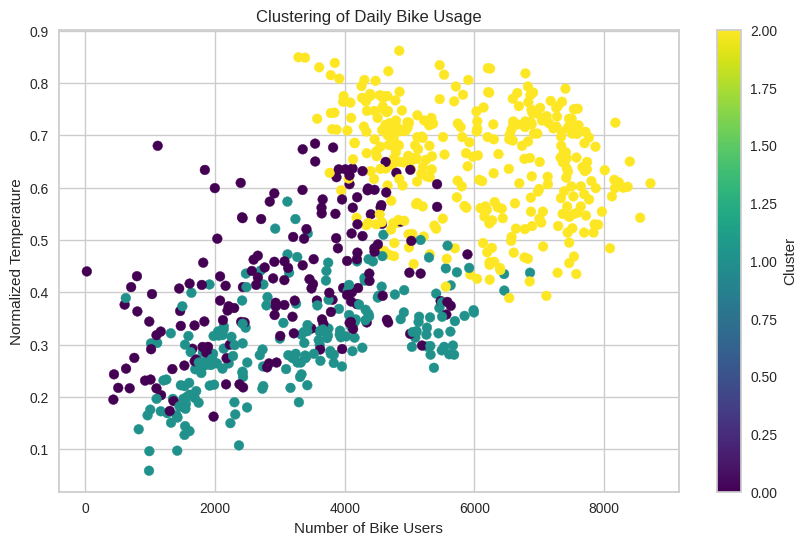

Cluster 0:
               cnt        temp         hum
count   173.000000  173.000000  173.000000
mean   3092.190751    0.423394    0.792497
std    1349.385913    0.126153    0.081148
min      22.000000    0.162500    0.636250
25%    2077.000000    0.341667    0.722174
50%    3228.000000    0.410000    0.789583
75%    4120.000000    0.520833    0.858333
max    5892.000000    0.684167    0.972500 

Cluster 1:
               cnt        temp         hum
count   214.000000  214.000000  214.000000
mean   3277.060748    0.309204    0.509184
std    1465.123706    0.092467    0.096934
min     623.000000    0.059130    0.000000
25%    1971.000000    0.256458    0.456771
50%    3269.500000    0.310181    0.515625
75%    4315.500000    0.366459    0.579444
max    6857.000000    0.573333    0.686364 

Cluster 2:
               cnt        temp         hum
count   344.000000  344.000000  344.000000
mean   5978.020349    0.647411    0.618963
std    1271.727155    0.102974    0.107236
min    3285.00000

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Contoh: Menggunakan 'cnt', 'temp', dan 'hum' untuk clustering
features = df_day[['cnt', 'temp', 'hum']]
features_scaled = StandardScaler().fit_transform(features)

# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)

# Menambahkan label cluster ke DataFrame
df_day['Cluster'] = kmeans.labels_

# Visualisasi hasil clustering untuk dua fitur pertama ('cnt' dan 'temp')
plt.figure(figsize=(10, 6))
plt.scatter(df_day['cnt'], df_day['temp'], c=df_day['Cluster'], cmap='viridis')
plt.title('Clustering of Daily Bike Usage')
plt.xlabel('Number of Bike Users')
plt.ylabel('Normalized Temperature')
plt.colorbar(label='Cluster')
plt.show()

# Analisis hasil
# Anda dapat menganalisis cluster dengan melihat statistik deskriptif atau distribusi fitur di setiap cluster
for cluster in sorted(df_day['Cluster'].unique()):
    print(f"Cluster {cluster}:")
    print(df_day[df_day['Cluster'] == cluster][['cnt', 'temp', 'hum']].describe(), "\n")


Dalam contoh ini, kita melakukan langkah-langkah berikut:

*   Memilih Fitur untuk Clustering: cnt, temp, dan hum dipilih sebagai fitur untuk clustering.

*   Fitur di-scale menggunakan StandardScaler untuk memastikan bahwa semua fitur memiliki bobot yang sama dalam proses clustering.

*   K-Means dijalankan dengan jumlah cluster yang ditentukan. Jumlah cluster (n_clusters) bisa disesuaikan berdasarkan analisis.


Hasil clustering divisualisasikan menggunakan scatter plot.

> Analisis Cluster: Melihat statistik deskriptif untuk setiap cluster dapat memberikan insight tentang karakteristik setiap segmen.
Perlu diingat bahwa pemilihan jumlah cluster yang tepat dan fitur untuk clustering sangat penting dan dapat mempengaruhi hasil analisis. Kita mungkin ingin menggunakan metode seperti Elbow Method untuk menentukan jumlah cluster yang optimal.